<a href="https://colab.research.google.com/github/Joakosalazar/Untitled6.ipynb/blob/main/Analisis_precio_de_una_accion_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('ENAG.csv', sep=',')

In [ ]:
df.head(n=5)

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,10.11.2023,"15,835","15,850","15,920","15,750","521,67K","-0,22%"
1,09.11.2023,"15,870","15,810","15,970","15,810","552,47K","0,41%"
2,08.11.2023,"15,805","15,980","15,985","15,790","620,83K","-1,06%"
3,07.11.2023,"15,975","16,070","16,140","15,960","469,82K","-0,84%"
4,06.11.2023,"16,110","16,105","16,150","16,010","452,71K","0,06%"


In [ ]:
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d.%m.%Y').dt.date

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Fecha     908 non-null    object
 1   Último    908 non-null    object
 2   Apertura  908 non-null    object
 3   Máximo    908 non-null    object
 4   Mínimo    908 non-null    object
 5   Vol.      907 non-null    object
 6   % var.    908 non-null    object
dtypes: object(7)
memory usage: 49.8+ KB


In [ ]:
df

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,2023-11-10,"15,835","15,850","15,920","15,750","521,67K","-0,22%"
1,2023-11-09,"15,870","15,810","15,970","15,810","552,47K","0,41%"
2,2023-11-08,"15,805","15,980","15,985","15,790","620,83K","-1,06%"
3,2023-11-07,"15,975","16,070","16,140","15,960","469,82K","-0,84%"
4,2023-11-06,"16,110","16,105","16,150","16,010","452,71K","0,06%"
...,...,...,...,...,...,...,...
903,2020-05-08,"20,590","20,600","20,650","20,500","313,66K","0,73%"
904,2020-05-07,"20,440","20,390","20,690","20,250","521,54K","0,29%"
905,2020-05-06,"20,380","20,500","20,660","20,310","920,31K","-2,02%"
906,2020-05-05,"20,800","20,490","20,810","20,100","622,57K","3,95%"


In [ ]:
df['Fecha'] = pd.to_datetime(df['Fecha']).dt.date

In [ ]:
X = df[['Fecha','Último','Apertura','Máximo','Mínimo','Vol.','% var.']]

In [ ]:
X

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,2023-11-10,"15,835","15,850","15,920","15,750","521,67K","-0,22%"
1,2023-11-09,"15,870","15,810","15,970","15,810","552,47K","0,41%"
2,2023-11-08,"15,805","15,980","15,985","15,790","620,83K","-1,06%"
3,2023-11-07,"15,975","16,070","16,140","15,960","469,82K","-0,84%"
4,2023-11-06,"16,110","16,105","16,150","16,010","452,71K","0,06%"
...,...,...,...,...,...,...,...
903,2020-05-08,"20,590","20,600","20,650","20,500","313,66K","0,73%"
904,2020-05-07,"20,440","20,390","20,690","20,250","521,54K","0,29%"
905,2020-05-06,"20,380","20,500","20,660","20,310","920,31K","-2,02%"
906,2020-05-05,"20,800","20,490","20,810","20,100","622,57K","3,95%"


In [ ]:
X.rename(columns={'Vol.': 'Volumen', '% var.': '%Variacion'}, inplace=True)

In [ ]:
X.dropna(inplace=True)

In [ ]:
def convertir_volumen(valor):
    valor = valor.replace(',', '.')  # Reemplazar la coma por un punto como separador decimal
    if 'K' in valor:
        return int(float(valor.replace('K', '')) * 1000)
    elif 'M' in valor:
        return int(float(valor.replace('M', '')) * 1000000)
    else:
        return int(valor)

# Aplicar la función a la columna 'Volumen'
X['Volumen'] = X['Volumen'].astype(str).apply(lambda x: convertir_volumen(x))

In [ ]:
X

,Fecha,Último,Apertura,Máximo,Mínimo,Volumen,%Variacion
0,2023-11-10,"15,835","15,850","15,920","15,750",521669,"-0,22%"
1,2023-11-09,"15,870","15,810","15,970","15,810",552470,"0,41%"
2,2023-11-08,"15,805","15,980","15,985","15,790",620830,"-1,06%"
3,2023-11-07,"15,975","16,070","16,140","15,960",469820,"-0,84%"
4,2023-11-06,"16,110","16,105","16,150","16,010",452710,"0,06%"
...,...,...,...,...,...,...,...
903,2020-05-08,"20,590","20,600","20,650","20,500",313660,"0,73%"
904,2020-05-07,"20,440","20,390","20,690","20,250",521539,"0,29%"
905,2020-05-06,"20,380","20,500","20,660","20,310",920310,"-2,02%"
906,2020-05-05,"20,800","20,490","20,810","20,100",622570,"3,95%"


In [ ]:
X['%Variacion'] = X['%Variacion'].str.replace('%', '').str.replace(',', '.').astype(float)

In [ ]:
X['Volumen'] = X['Volumen'].astype(int)
X['Apertura'] = X['Apertura'].str.replace(',', '.').astype(float)
X['Máximo'] = X['Máximo'].str.replace(',', '.').astype(float)
X['Mínimo'] = X['Mínimo'].str.replace(',', '.').astype(float)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907 entries, 0 to 907
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fecha       907 non-null    object 
 1   Último      907 non-null    object 
 2   Apertura    907 non-null    float64
 3   Máximo      907 non-null    float64
 4   Mínimo      907 non-null    float64
 5   Volumen     907 non-null    int32  
 6   %Variacion  907 non-null    float64
dtypes: float64(4), int32(1), object(2)
memory usage: 53.1+ KB


In [ ]:
X['Último'] = X['Último'].str.replace(',', '.').astype(float)

In [ ]:
X

,Fecha,Último,Apertura,Máximo,Mínimo,Volumen,%Variacion
0,2023-11-10,15.835,15.850,15.920,15.75,521669,-0.22
1,2023-11-09,15.870,15.810,15.970,15.81,552470,0.41
2,2023-11-08,15.805,15.980,15.985,15.79,620830,-1.06
3,2023-11-07,15.975,16.070,16.140,15.96,469820,-0.84
4,2023-11-06,16.110,16.105,16.150,16.01,452710,0.06
...,...,...,...,...,...,...,...
903,2020-05-08,20.590,20.600,20.650,20.50,313660,0.73
904,2020-05-07,20.440,20.390,20.690,20.25,521539,0.29
905,2020-05-06,20.380,20.500,20.660,20.31,920310,-2.02
906,2020-05-05,20.800,20.490,20.810,20.10,622570,3.95


Y=df[['Último','Fecha']]

Y.info()

Y['Último'] = Y['Último'].str.replace(',', '.').astype(float)

Y

### A)

In [ ]:
from datetime import datetime

# Convertir la cadena de texto a un objeto datetime
start_date_train = datetime.strptime('2020-05-04', '%Y-%m-%d').date()
end_date_train = datetime.strptime('2023-01-31', '%Y-%m-%d').date()

# Filtrar los datos
X_train_A = X[(X['Fecha'] >= start_date_train) & (X['Fecha'] <= end_date_train)]

In [ ]:
porcentaje_train_A = len(X_train_A) / len(X) * 100

print(f"El porcentaje de X_train_A respecto a X es: {porcentaje_train_A:.2f}%")

El porcentaje de X_train_A respecto a X es: 78.06%


In [ ]:
start_date_test = datetime.strptime('2023-02-01', '%Y-%m-%d').date()
end_date_test = datetime.strptime('2023-11-10', '%Y-%m-%d').date()

# Filtrar los datos
X_test_A = X[(X['Fecha'] >= start_date_test) & (X['Fecha'] <= end_date_test)]

In [ ]:
porcentaje_test_A= len(X_test_A) / len(X) * 100

print(f"El porcentaje de X_test_A respecto a X es: {porcentaje_test_A:.2f}%")

El porcentaje de X_test_A respecto a X es: 21.94%


### B)

In [ ]:
start_date_train = datetime.strptime('2020-05-04', '%Y-%m-%d').date()
end_date_train = datetime.strptime('2023-08-31', '%Y-%m-%d').date()

# Filtrar los datos
X_train_B = X[(X['Fecha'] >= start_date_train) & (X['Fecha'] <= end_date_train)]

start_date_test = datetime.strptime('2023-09-01', '%Y-%m-%d').date()
end_date_test = datetime.strptime('2023-11-10', '%Y-%m-%d').date()

# Filtrar los datos
X_test_B = X[(X['Fecha'] >= start_date_test) & (X['Fecha'] <= end_date_test)]

In [ ]:
porcentaje_train_B = len(X_train_B) / len(X) * 100

print(f"El porcentaje de X_train_B respecto a X es: {porcentaje_train_B:.2f}%")
porcentaje_test_B= len(X_test_B) / len(X) * 100

print(f"El porcentaje de X_test_B respecto a X es: {porcentaje_test_B:.2f}%")

El porcentaje de X_train_B respecto a X es: 94.38%
El porcentaje de X_test_B respecto a X es: 5.62%


### C)

In [ ]:
# Convertir la cadena de texto a un objeto datetime
start_date_train = datetime.strptime('2020-05-04', '%Y-%m-%d').date()
end_date_train = datetime.strptime('2022-08-31', '%Y-%m-%d').date()

# Filtrar los datos
X_train_C = X[(X['Fecha'] >= start_date_train) & (X['Fecha'] <= end_date_train)]

start_date_test = datetime.strptime('2022-09-01', '%Y-%m-%d').date()
end_date_test = datetime.strptime('2023-11-10', '%Y-%m-%d').date()

# Filtrar los datos
X_test_C = X[(X['Fecha'] >= start_date_test) & (X['Fecha'] <= end_date_test)]

In [ ]:
porcentaje_train_C = len(X_train_C) / len(X) * 100

print(f"El porcentaje de X_train_C respecto a X es: {porcentaje_train_C:.2f}%")
porcentaje_test_C= len(X_test_C) / len(X) * 100

print(f"El porcentaje deX_test_C respecto a X es: {porcentaje_test_C:.2f}%")

El porcentaje de X_train_C respecto a X es: 66.15%
El porcentaje deX_test_C respecto a X es: 33.85%


#### Muestra gráficamente las tres opciones en un gráfico de serie temporal para el precio de cierre.


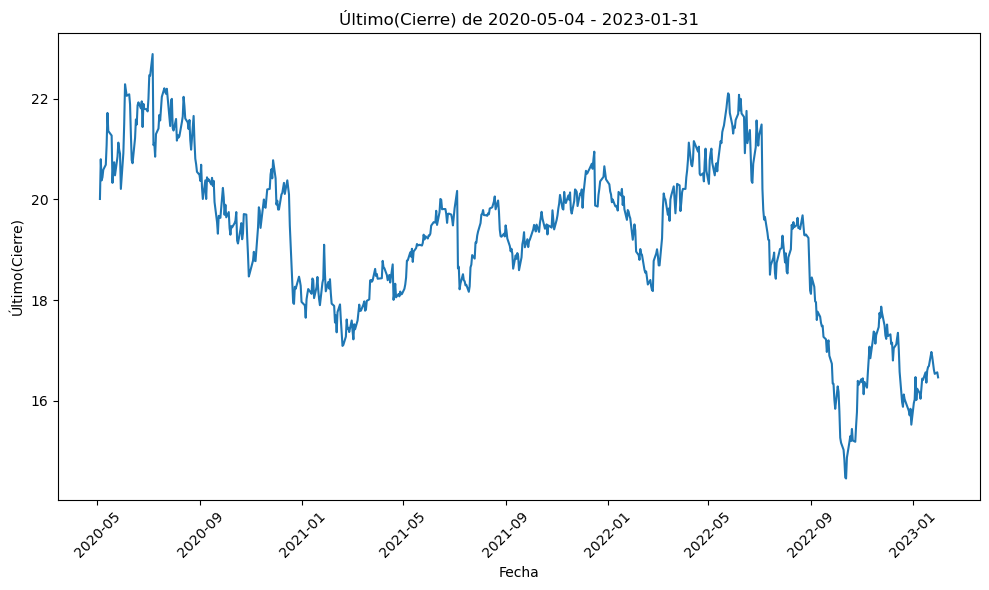

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(X_train_A['Fecha'], X_train_A['Último'])

plt.title('Último(Cierre) de 2020-05-04 - 2023-01-31')
plt.xlabel('Fecha')
plt.ylabel('Último(Cierre)')
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para mejor legibilidad
plt.tight_layout()  # Ajusta automáticamente los parámetros del subplot
plt.show()

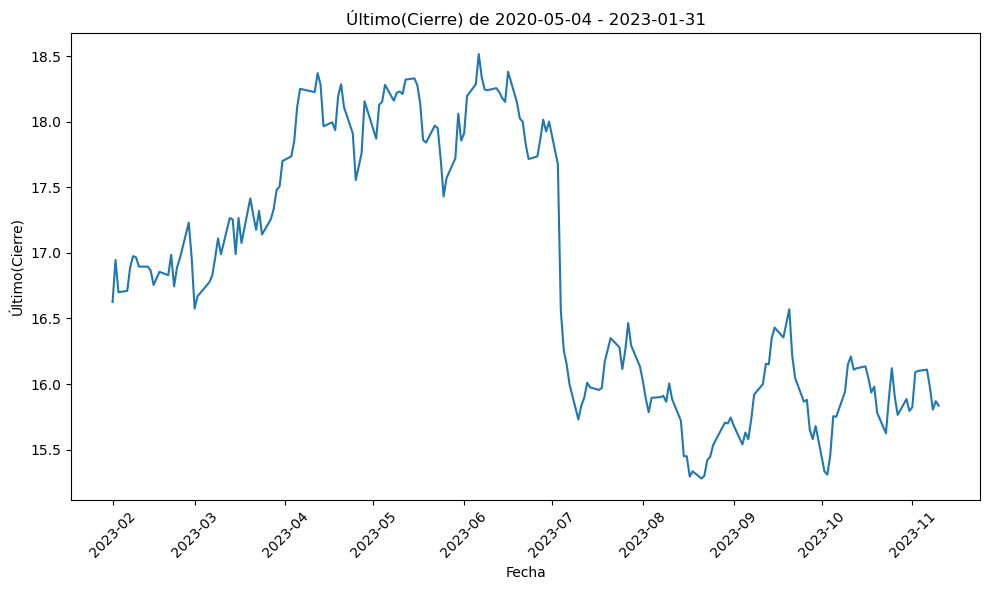

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(X_test_A['Fecha'], X_test_A['Último'])

plt.title('Último(Cierre) de 2020-05-04 - 2023-01-31')
plt.xlabel('Fecha')
plt.ylabel('Último(Cierre)')
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para mejor legibilidad
plt.tight_layout()  # Ajusta automáticamente los parámetros del subplot
plt.show()

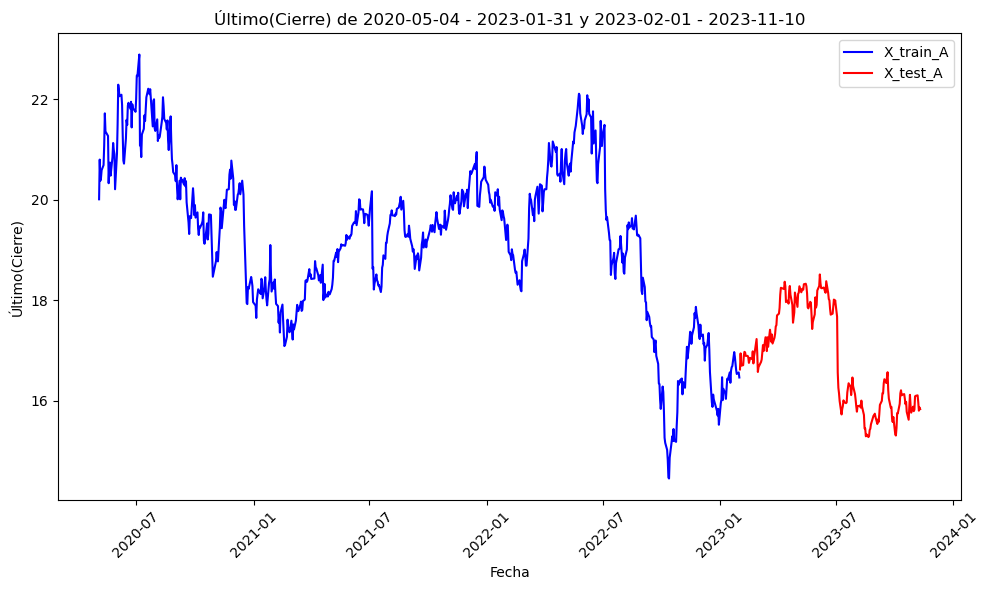

In [ ]:
plt.figure(figsize=(10, 6))

# Graficar X_train_A en azul
plt.plot(X_train_A['Fecha'], X_train_A['Último'], label='X_train_A', color='blue')

# Graficar X_test_A en rojo
plt.plot(X_test_A['Fecha'], X_test_A['Último'], label='X_test_A', color='red')

plt.title('Último(Cierre) de 2020-05-04 - 2023-01-31 y 2023-02-01 - 2023-11-10')
plt.xlabel('Fecha')
plt.ylabel('Último(Cierre)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()  # Mostrar la leyenda con los nombres de los conjuntos
plt.show()